<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 50px;">
<h1 style="font-size: 36px; font-weight: bold; color: #4CAF50;">Mini-devoir 5 -- Hiver 2025</h1>
<h1 style="font-size: 20px; font-weight: bold; color: #4CAF50;">PHS3903 -- Projet de simulation</h1>
<h2 style="font-size: 20px; margin-bottom: 20px;">[Argueta, Enrique]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[2118071]</h2>
<h2 style="font-size: 20px; margin-bottom: 20px;">[Chabchoub, Alaa]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[2054597]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[26-2-2025]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[Nom des Professeurs]</h2>
</div>

--------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------


## Directives

Répondre aux questions suivantes à l'aide du code Python fourni sur Moodle, auquel vous aurez apporté les modifications nécessaires. Justifier vos réponses avec clarté et concision. Vos tableaux et figures doivent être lisibles et présentés selon les règles de l'art.

Remettre un fichier en format Jupyter Notebook (.ipynb) en utilisant le gabarit fourni dans la boîte de dépôt Moodle.


--------------------------------------------------------------------------------------------------------------------------------------------------------


## Méthode de Newton pour ajustement des données expérimentales (20 points)

Dans le cadre de ce mini-projet, nous utiliserons la méthode de Newton pour ajuster sur des données expérimentales une équation analytique de la forme :
$$ye = \frac{p_1}{p^2_2 + (xe-p_3)^2}$$
Les données à importer dans votre code se trouvent dans le fichier « mini\_projet\_3\_donnees.txt ».

Entre autre, on vous demande de programmer la méthode de Newton pour déduire la valeur des paramètres $p_1$, $p_2$, et $p_3$. Ce problème d’ajustement de modèle théorique $(x,y)$ sur des données expérimentales $(x_e, y_e)$ peut être ramené à la minimisation de la fonction d’erreur :
$$Q(p_1, p_2, p_3) = \frac{1}{2}\sum_{i=1}^{\text{length}(xe)} q_i(p_1, p_2, p_3)^2$$
où on définit :
$$q_i(p_1, p_2, p_3) = ye_i - \frac{p_1}{p^2_2 + (xe-p_3)^2} \,.$$


--------------------------------------------------------------------------------------------------------------------------------------------------------

### Question 1 : Déterminer les dérivées

**(5 points)** Écrivez de façon explicite les trois expressions des dérivées de premier ordre $\frac{\partial q_i}{\partial p_j}$ avec $j = 1, 2, 3$ au moyen de (3).

**(5 points)** Écrivez de façon explicite les neuf expressions de dérivée seconde $\frac{\partial^2 q_i}{\partial p_j \partial p_k}$, avec $j, k = 1, 2, 3$. Notez bien que seules six d’entre elles sont différentes.


### Réponse **a)** :


### Réponse **b)** :


--------------------------------------------------------------------------------------------------------------------------------------------------------

### Question 2 : Implémentation de la méthode de Newton

**(3 points)** Utilisez les données expérimentales qui se trouvent dans le fichier *mini_projet_3_donnees.txt* (le fichier est disponible sur Moodle). Utilisez une tolérance $\text{tol} = 10^{-6}$. Quelles sont les valeurs convergées des paramètres $p_1^{(conv)}$, $p_2^{(conv)}$, $p_3^{(conv)}$ ? Donnez un exemple des valeurs initiales $\mathbf{p}_0 = (p_1, p_2, p_3)$ qui mènent à la convergence d’une méthode de Newton.

**(2 points)** Quelle est la valeur de la fonction d’erreur $Q(p_1^{(conv)}, p_2^{(conv)}, p_3^{(conv)}$ ?


### Réponse **c)** :


Valeurs convergées pour p0= (1.0, 0.5, 0.2),  p1 = 1433.375040, p2 = -930.990427, p3 = 1.193053, err= 17.547845359278853
Valeurs convergées pour p0=['0.399202', '1.382932', '2.750000'] : p1 = -12708.612860, p2 = 2901.644195, p3 = 256.884363, err= 5.135259789258056
Valeurs convergées pour p0=['0.479042', '1.106345', '3.025000'] : p1 = 2.000000, p2 = 2.236068, p3 = 3.000000, err= 3.4650604643927565e-08


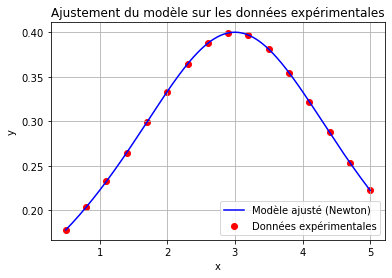

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valeurs initiales pour les paramètres (à ajuster selon les résultats précédents)
p0 = p1_conv, p2_conv, p3_conv = 1.0, 0.5, 0.2  # Remplacer par les valeurs réelles trouvées
tol = 1e-6

def read_data(filename):
    data = np.loadtxt(filename)  # Charge le fichier sous forme de tableau NumPy
    x = data[:, 0]  # Première colonne : x
    y = data[:, 1]  # Deuxième colonne : y
    return x, y

# Exemple d'utilisation
filename = "mini_projet_4_donnees.txt"
x, y = read_data(filename)

# Méthode de Newton pour ajuster les paramètres p1, p2, p3
def newton_method(x, y, p1, p2, p3, tol):
    N = len(x)
    c = 0
    err = 2 * tol

    while err > tol and c < 100:
        c += 1
        
        # Calcul de la fonction d'erreur et ses dérivées par rapport à p1, p2, p3
        q = y - p1 / (p2**2 + (x - p3)**2)
        dqdp1 = -1 / (p2**2 + (x - p3)**2)
        dqdp2 = 2 * p2 * p1 / (p2**2 + (x - p3)**2)**2
        dqdp3 = -2 * (x - p3) * p1 / (p2**2 + (x - p3)**2)**2

        F1 = np.sum(q * dqdp1)
        F2 = np.sum(q * dqdp2)
        F3 = np.sum(q * dqdp3)
        F = np.array([F1, F2, F3])

        # Calcul des dérivées secondes
        d2qdp1dp2 = 2 * p2 / (p2**2 + (x - p3)**2)**2
        d2qdp1dp3 = -2 * (x - p3) / (p2**2 + (x - p3)**2)**2
        d2qdp2dp3 = 8 * p1 * (x - p3) * p2 / (p2**2 + (x - p3)**2)**3
        d2qd2p3 = (2 * p1 * p3 / (p2**2 + (x - p3)**2)**2) - (8 * p1 * (x - p3)**2 / (p2**2 + (x - p3)**2)**3)
        d2qd2p1 = 0  
        d2qd2p2 = (2 * p1 / (p2**2 + (x - p3)**2)**2) - (4 * p1 * p2**2 / (p2**2 + (x - p3)**2)**3)


        # Calcul de la matrice Jacobienne
        dF1dp1 = np.sum(dqdp1 * dqdp1) + np.sum(q * d2qd2p1)
        dF1dp2 = np.sum(dqdp2 * dqdp1) + np.sum(q * d2qdp1dp2)
        dF1dp3 = np.sum(dqdp3 * dqdp1) + np.sum(q * d2qdp1dp3)
        dF2dp1 = np.sum(dqdp1 * dqdp2) + np.sum(q * d2qdp1dp2)
        dF2dp2 = np.sum(dqdp2 * dqdp2) + np.sum(q * d2qd2p2)
        dF2dp3 = np.sum(dqdp3 * dqdp2) + np.sum(q * d2qdp2dp3)
        dF3dp1 = np.sum(dqdp1 * dqdp3) + np.sum(q * d2qdp1dp3)
        dF3dp2 = np.sum(dqdp2 * dqdp3) + np.sum(q * d2qdp2dp3)
        dF3dp3 = np.sum(dqdp3 * dqdp3) + np.sum(q * d2qd2p3)
               

        dFdc = np.array([
            [dF1dp1, dF1dp2, dF1dp3],
            [dF2dp1, dF2dp2, dF2dp3],
            [dF3dp1, dF3dp2, dF3dp3]
        ])

        lambda_reg = 1e-6  # Petite valeur pour régulariser
        dFdc += lambda_reg * np.eye(3)  # Ajouter pour stabiliser l'inversion

        # Mise à jour des paramètres
        dc = -np.linalg.solve(dFdc, F)
        p1 += dc[0]
        p2 += dc[1]
        p3 += dc[2]
        err = np.linalg.norm(dc)
        #print(f"Iteration {c}: p1={p1:.6f}, p2={p2:.6f}, p3={p3:.6f}, err={err:.6e}")

    return p1, p2, p3, err



# Trouver les valeurs convergées
p1_final, p2_final, p3_final, err = newton_method(x, y, *p0, tol)
print(f"Valeurs convergées pour p0= {p0},  p1 = {p1_final:.6f}, p2 = {p2_final:.6f}, p3 = {p3_final:.6f}, err= {err}")


# pas de convergence avec p0
# optimiser amplitude, centre et largeur de la courbe 

p1_init = np.max(y)  # valeur maximale de y
p2_init = np.std(x)  # Écart-type de x 
p3_init = np.mean(x)  # Moyenne des x
p02 = (p1_init , p2_init, p3_init ) 

p1_final, p2_final, p3_final, err = newton_method(x, y, *p02, tol)
print(f"Valeurs convergées pour p0={[f'{p:.6f}' for p in p02]} : p1 = {p1_final:.6f}, p2 = {p2_final:.6f}, p3 = {p3_final:.6f}, err= {err}")
# ne converge pas 

# rajouter et ou enlever 10 ou 20%
p01 = (p1_init * 1.2 , p2_init * 0.8, p3_init * 1.1 ) 

p1_final, p2_final, p3_final, err = newton_method(x, y, *p01, tol)
print(f"Valeurs convergées pour p0={[f'{p:.6f}' for p in p01]} : p1 = {p1_final:.6f}, p2 = {p2_final:.6f}, p3 = {p3_final:.6f}, err= {err}")

def model_function(x, p1, p2, p3):
    return p1 / (p2**2 + (x - p3)**2)

#Générer une courbe lisse pour la fonction ajustée
x_fit = np.linspace(min(x), max(x), 500) 
y_fit = model_function(x_fit, p1_final, p2_final, p3_final)

# Tracé des données expérimentales
plt.scatter(x, y, color='red', label="Données expérimentales")  
plt.plot(x_fit, y_fit, color='blue', label="Modèle ajusté (Newton)")  

# Ajout des labels et légende
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajustement du modèle sur les données expérimentales")
plt.legend()
plt.grid()
plt.show()



### Réponse **d)** :


In [88]:
# Calcul de la fonction d'erreur Q
def error_function(p1, p2, p3, x, y):
    q = y - (p1 / (p2**2 + (x - p3)**2))  # Calcul de q_i pour chaque point
    Q = 0.5 * np.sum(q**2)  # Somme des carrés des erreurs, multipliée par 1/2
    return Q

Q_final = error_function(p1_final, p2_final, p3_final, x, y)
print(f"Valeur de la fonction d'erreur Q : {Q_final}")


Valeur de la fonction d'erreur Q : 5.209872883683201e-17


--------------------------------------------------------------------------------------------------------------------------------------------------------


### Question 3 : Sensibilité de la méthode

**(3 points)** Il est bien connu que la convergence de la méthode de Newton est très sensible aux estimations initiales des paramètres $\mathbf{p}_0$. Il est donc intéressant d’étudier la région de convergence de la méthode.

En particulier, utilisez les valeurs convergées des paramètres $p_1^{(conv)}$, $p_2^{(conv)}$, $p_3^{(conv)}$ trouvés dans la partie c). Répétez la méthode de Newton pour différentes valeurs initiales de la forme $\mathbf{p}_n^{(0)} = (p_1^{(conv)}, p_2^{(conv)}, p_3) $, avec $p_3 = (0:0.001:2)p_3^{(conv)}$. Ensuite, tracez $Q$ comme une fonction de $p_3$ sur l’échelle logarithmique.


### Reponse **e)** :

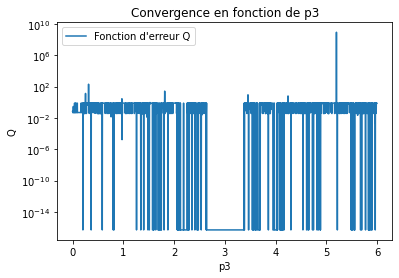

In [89]:
# Fonction principale pour explorer la région de convergence
import matplotlib.pyplot as plt

p3_values = np.arange(0, 2 * p3_final, 0.001 * p3_final)
def explorer_convergence(p1_conv, p2_conv, p3_conv, x, y, tol=1e-6):
    global p3_values
    Q_values = []
    p3Evaluated = []
    stable_p3_min = None
    stable_p3_max = None

    for p3 in p3_values:
        p1, p2, p3_final, err = newton_method(x, y, p1_conv, p2_conv, p3, tol)
        Q = error_function(p1, p2, p3_final, x, y)
        Q_values.append(Q)
        p3Evaluated.append(p3)


    plt.plot(p3Evaluated, Q_values, label="Fonction d'erreur Q")
    plt.yscale('log')  
    plt.xlabel("p3")
    plt.ylabel("Q")
    plt.title("Convergence en fonction de p3")
    plt.legend()
    plt.show()
    return stable_p3_min, stable_p3_max , Q_values

# Explorer la convergence pour différentes valeurs de p3
p3_min, p3_max, Qvalues = explorer_convergence(p1_final, p2_final, p3_final, x, y, tol)



**(2 points)** Trouvez le plus large intervalle de stabilité $p_3^{(min)} \leq p_3 \leq p_3^{(max)}$ de la méthode en fonction de la valeur de $p_3$. Quelles sont les valeurs de $p_3^{(min)}$ et $p_3^{(max)}$ ?

### Réponse **f)** :

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [90]:
Qlog = np.log(np.array(Qvalues))


oscillation = 0.1
intervalleMax = 0
iD = 0
refID = 0
ref=None
for i, val in enumerate(Qlog):
    if ref is None: ref = val; refID = i
    if ref > (Qlog[i] + oscillation) or  ref < (Qlog[i] - oscillation):
        if intervalleMax < (i- refID):
            iD = refID
            intervalleMax = (i- refID)
        ref = None
print(f"La plus large Intervalle de stabilité est : p3_min = {p3_values[iD]:.6f}, p3_max = {p3_values[iD+intervalleMax]:.6f}")

    
    

La plus large Intervalle de stabilité est : p3_min = 2.643000, p3_max = 3.378000
